<a href="https://colab.research.google.com/github/harwarl/Pytorch/blob/main/Transform_with_CenterCrop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [3]:
pwd

'/content'

In [4]:
data_path = "/content/"
cif_10 = datasets.CIFAR10(data_path, train = True, download = True, transform = transforms.ToTensor())

Files already downloaded and verified


In [5]:
imgs = torch.stack([img for img, label in cif_10], dim = 3)

In [6]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [7]:
mean = torch.mean(imgs.reshape(3, -1), dim = 1)
std = torch.std(imgs.reshape(3, -1), dim = 1)

In [8]:
print(mean)
print(std)

tensor([0.4914, 0.4822, 0.4465])
tensor([0.2470, 0.2435, 0.2616])


In [9]:
transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2470, 0.2435, 0.2616])

Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.247, 0.2435, 0.2616])

In [10]:
cif_10 = datasets.CIFAR10(data_path, train = True, download = True, transform= transforms.Compose([
                                                                                                  transforms.CenterCrop(30),
                                                                                                  transforms.ToTensor(),
                                                                                                  transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                                                                                       (0.247, 0.2435, 0.2616))
]))
cif_10_val = datasets.CIFAR10(data_path, train = False, download = True, transform= transforms.Compose([
                                                                                                  transforms.CenterCrop(30),
                                                                                                  transforms.ToTensor(),
                                                                                                  transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                                                                                       (0.247, 0.2435, 0.2616))
]))


Files already downloaded and verified
Files already downloaded and verified


In [11]:
img, _ = cif_10[0]

In [12]:
img.shape

torch.Size([3, 30, 30])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


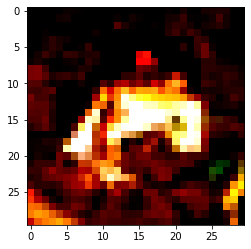

In [13]:
plt.imshow(img.permute(1, 2, 0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


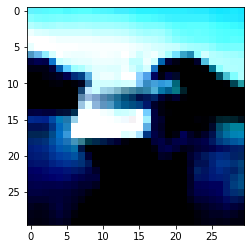

In [17]:
img, _ = cif_10[777]
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [20]:
label_map = {0:0, 2:1}
class_label = ['aeroplane', 'bird']
Train = [(img, label_map[label]) for img, label in cif_10 if label in [0, 2]]
Valid = [(img, label_map[label]) for img, label in cif_10_val if label in [0, 2]]

In [22]:
img, _ = Train[10]
img.shape

torch.Size([3, 30, 30])

In [23]:
train_loader = torch.utils.data.DataLoader(Train, batch_size = 50, shuffle = True)
val_loader = torch.utils.data.DataLoader(Valid, batch_size= 50, shuffle = False)


In [24]:
import torch.optim as optim
import torch.nn as nn 

In [26]:
img.reshape(-1).unsqueeze(0).shape

torch.Size([1, 2700])

In [ ]:
dir(nn)

In [34]:
model = nn.Sequential(
    nn.Linear(2700, 128),
    nn.Tanh(),
    nn.Linear(128, 64),
    nn.Tanh(),
    nn.Linear(64, 2),
    nn.Softmax(dim = 1)
)

optimizer = optim.SGD(model.parameters(), lr = 1e-2)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 100
for epoch in range(1, n_epochs + 1):
  for img, labels in train_loader:
    batch = img.shape[0]
    output = model(img.reshape(batch, -1))
    loss = loss_fn(output, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f"Epoch: {epoch}, Training_Loss: {loss}")

Epoch: 1, Training_Loss: 0.5238345265388489
Epoch: 2, Training_Loss: 0.5477621555328369
Epoch: 3, Training_Loss: 0.5293139219284058
Epoch: 4, Training_Loss: 0.5727030038833618
Epoch: 5, Training_Loss: 0.5159861445426941
Epoch: 6, Training_Loss: 0.5189054012298584
Epoch: 7, Training_Loss: 0.4811580777168274
Epoch: 8, Training_Loss: 0.5376347303390503
Epoch: 9, Training_Loss: 0.5432723760604858
Epoch: 10, Training_Loss: 0.4694521427154541
Epoch: 11, Training_Loss: 0.5199769735336304
Epoch: 12, Training_Loss: 0.43713417649269104
Epoch: 13, Training_Loss: 0.4859320819377899
Epoch: 14, Training_Loss: 0.5330411791801453
Epoch: 15, Training_Loss: 0.4821782410144806
Epoch: 16, Training_Loss: 0.4761878550052643
Epoch: 17, Training_Loss: 0.42981669306755066
Epoch: 18, Training_Loss: 0.519975483417511
Epoch: 19, Training_Loss: 0.54617840051651
Epoch: 20, Training_Loss: 0.5215085744857788
Epoch: 21, Training_Loss: 0.5113666653633118
Epoch: 22, Training_Loss: 0.4978198707103729
Epoch: 23, Training_

In [59]:
total = 0
correct = 0

with torch.no_grad():
  for img, labels in val_loader:
    batch = img.shape[0]
    output = model(img.reshape(batch, -1))
    _, predicted = torch.max(output, dim = 1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())

  print('Test_Accuracy: %f'%(correct / total))

  total = 0
correct = 0

with torch.no_grad():
  for img, labels in train_loader:
    batch = img.shape[0]
    output = model(img.reshape(batch, -1))
    _, predicted = torch.max(output, dim = 1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())

  print('Train_Accuracy: %f'%(correct / total))

Test_Accuracy: 0.817500
Train_Accuracy: 0.954600


In [60]:
model = nn.Sequential(
    nn.Linear(2700, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 64),
    nn.Tanh(),
    nn.Linear(64, 2),
    nn.Softmax(dim = 1)
)

optimizer = optim.SGD(model.parameters(), lr = 1e-2)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 100
for epoch in range(1, n_epochs + 1):
  for img, labels in train_loader:
    batch = img.shape[0]
    output = model(img.reshape(batch, -1))
    loss = loss_fn(output, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f"Epoch: {epoch}, Training_Loss: {loss}")

Epoch: 1, Training_Loss: 0.5640178918838501
Epoch: 2, Training_Loss: 0.586580753326416
Epoch: 3, Training_Loss: 0.5639459490776062
Epoch: 4, Training_Loss: 0.5113081336021423
Epoch: 5, Training_Loss: 0.5340032577514648
Epoch: 6, Training_Loss: 0.4794950783252716
Epoch: 7, Training_Loss: 0.4623955488204956
Epoch: 8, Training_Loss: 0.5178844332695007
Epoch: 9, Training_Loss: 0.4585609436035156
Epoch: 10, Training_Loss: 0.49199092388153076
Epoch: 11, Training_Loss: 0.5442324280738831
Epoch: 12, Training_Loss: 0.5168722867965698
Epoch: 13, Training_Loss: 0.5450350046157837
Epoch: 14, Training_Loss: 0.5465836524963379
Epoch: 15, Training_Loss: 0.5129114389419556
Epoch: 16, Training_Loss: 0.4413834810256958
Epoch: 17, Training_Loss: 0.5947495102882385
Epoch: 18, Training_Loss: 0.5068360567092896
Epoch: 19, Training_Loss: 0.48645997047424316
Epoch: 20, Training_Loss: 0.4778425097465515
Epoch: 21, Training_Loss: 0.463077574968338
Epoch: 22, Training_Loss: 0.4541630148887634
Epoch: 23, Training

In [39]:
img, _ = Train[9]

In [41]:
val_loader